In [ ]:
import pandas as pd
dataIn = './../dataIn/'
dataOut = './../dataOut/'

In [ ]:
filename = dataIn + 'payment07.csv'
payment = pd.read_csv(filename, encoding='CP949')
payment

In [ ]:
payment['성별'].unique()

In [ ]:
# 성별에 따른 교통비 집계
mygrouping = payment.groupby('성별')['교통비']
mygrouping.sum()

In [ ]:
mygrouping.count()

In [ ]:
result = payment.groupby('성별')['출장기간'].agg('mean')
result

In [ ]:
agg_dict = {'출장기간':'sum', '출장지역':'count'}
result = payment.groupby('성별').agg(agg_dict)
result

In [ ]:
# 출장지역별 성별의 교통비의 총합
result = payment.groupby(['출장지역', '성별'])['교통비'].agg('sum')
result

In [ ]:
mydict = {'교통비': ['sum', 'mean', 'max'], '출장기간': ['mean', 'min']}
result = payment.groupby(['출장지역', '성별']).agg(mydict)
result

In [ ]:
filename = dataIn + 'welfareCleanNew.csv'
welfare = pd.read_csv(filename, encoding='UTF-8')
welfare.columns

In [ ]:
print('# 각 컬럼에 대한 데이터 분포 확인')
for col in welfare.columns:
    print(f'{col} 컬럼 정보')
    print(welfare[col].unique())
    print('-'*30)
# end for

In [ ]:
# 결혼 유무별 소득의 평균 그래프

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [ ]:
welfare['결혼 유무'].unique()

In [ ]:
chartdata = welfare.groupby('결혼 유무')['소득'].mean()
chartdata

In [ ]:
chartdata.plot(kind='pie', figsize=(7, 5), autopct='%1.1f%%')
plt.title('결혼 유무별 소득의 평균', size=17)
plt.axis('equal') # 도형 왜곡 방지를 위하여 가로 세로 비율 일대일로 그려 주세요.
plt.legend(labels=chartdata.index, loc='upper left')

In [ ]:
# 소득과 나이의 산점도
welfare.plot(kind='scatter', figsize=(10, 5), x='소득', y='나이')
plt.title('산점도 : 소득 ds 나이')

In [ ]:
# 결혼 유무별 소득의 박스 플롯
marriage = [item for item in welfare['결혼 유무'].unique()]
marriage # 범주형 데이터

xData= [] # 범주형 데이터별 소득 정보를 담아 놓은 리스트
for mar in marriage:
    xData.append(welfare[welfare['결혼 유무']==mar]['소득'])
# end for

# xData

Text(0.5, 1.0, '결혼 유무별 소득(박스 플롯)')

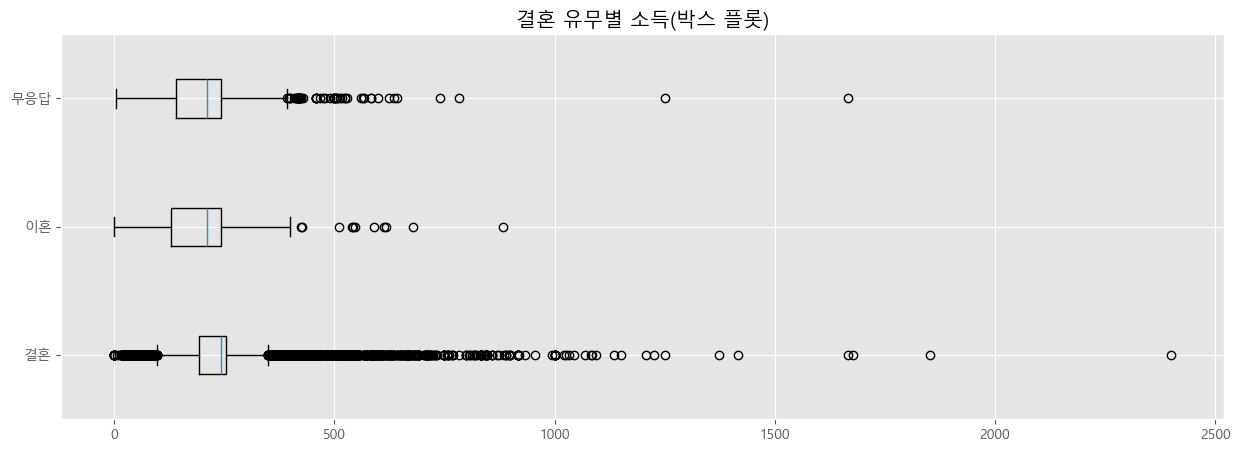

In [48]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))

plt.boxplot(
    x=[
        welfare[welfare['결혼 유무']=='결혼']['소득'],
        welfare[welfare['결혼 유무']=='이혼']['소득'],
        welfare[welfare['결혼 유무']=='무응답']['소득']
    ],
    tick_labels=['결혼', '이혼', '무응답'],
    vert=False
)

plt.title('결혼 유무별 소득(박스 플롯)')

In [36]:
concern = ['성별', '지역구', '나이', '소득'] # 분석 대상 컬럼
newWelfare = welfare[concern]
newWelfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7529 entries, 0 to 7528
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      7529 non-null   object 
 1   지역구     7529 non-null   object 
 2   나이      7529 non-null   int64  
 3   소득      7529 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 235.4+ KB


In [37]:
newWelfare.head() # head() 함수는 앞 5행만 보여줌 ↔ tail()

,성별,지역구,나이,소득
0,남성,서울,73,120.0
1,남성,서울,76,220.2
2,남성,서울,75,139.0
3,남성,서울,68,150.0
4,남성,서울,61,166.0


In [39]:
print('# 소득 컬럼 누락 데이터 확인')
if newWelfare['소득'].hasnans :
    print('누락 데이터 있음')
else:
    print('누락 데이터 없음')

# 소득 컬럼 누락 데이터 확인
누락 데이터 없음


In [40]:
print(f'# 소득 컬럼의 형상 : {newWelfare.shape}')

# 소득 컬럼의 형상 : (7529, 4)


In [43]:
print('# 소득 컬럼 기초 통계량 확인')
# 메소드 체이닝 : 메소드 작성시 dot(.)를 연속으로 작성하는 기법
newWelfare['소득'].describe().to_frame().T

# 소득 컬럼 기초 통계량 확인


,count,mean,std,min,25%,50%,75%,max
소득,7529.0,241.619016,144.679991,0.0,162.6,241.619016,241.619016,2400.0


In [46]:
print('# 소득 오름차순으로 정렬해보기')
newWelfare['소득'].sort_values().head(10).to_frame().T

# 소득 오름차순으로 정렬해보기


,4426,4428,4484,4454,4393,4479,4417,1400,3353,4636
소득,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
print('# 소득 내림차순으로 정렬해보기')
newWelfare['소득'].sort_values(ascending=False).head(10).to_frame().T

# 소득 내림차순으로 정렬해보기


,881,7136,7250,5484,2409,4740,5488,5485,7526,4747
소득,2400.0,1853.3,1678.7,1666.7,1666.66,1416.7,1374.0,1250.0,1250.0,1226.7


In [49]:
# 소득이 1200보다 큰 데이터들은 이상치(outlier)라고 가정하고 삭제합니다.
print(f'# 제거전 갯수 : {len(newWelfare)}')
newWelfare = newWelfare.loc[newWelfare['소득'] <= 1200]
print(f'# 제거후 갯수 : {len(newWelfare)}')

print(f'# 소득 최대값 : {newWelfare["소득"].max()}')
print(f'# 소득 최소값 : {newWelfare["소득"].min()}')

# 제거전 갯수 : 7529
# 제거후 갯수 : 7518
# 소득 최대값 : 1150.0
# 소득 최소값 : 0.0


In [ ]:
# 히스토그램 그리기

Text(0.5, 0, '소득')

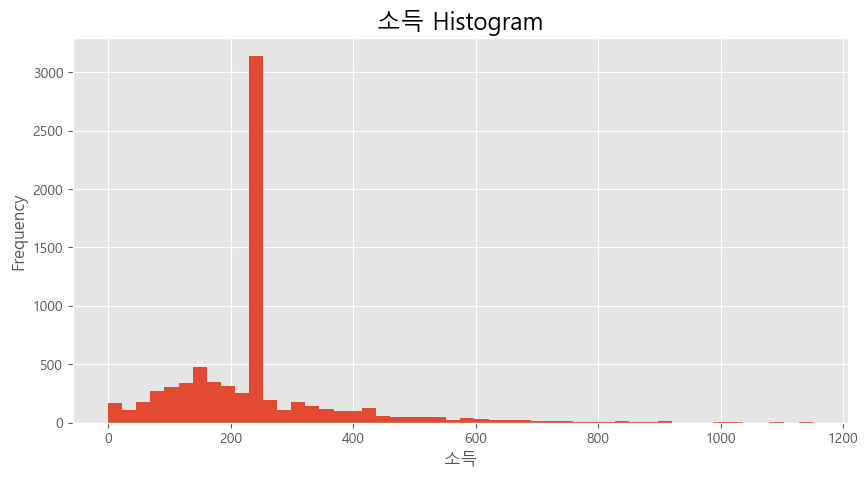

In [53]:
hist_chart = newWelfare["소득"]
hist_chart.plot(kind='hist', figsize=(10, 5), bins=50) # bins는 계급의 갯수
plt.title('소득 Histogram', size=17)
plt.xlabel('소득')

In [ ]:
# 데이터 이산화

In [54]:
import numpy as np
# np.inf : 무한대
mybins = [-np.inf, 200, 500, 700, 1000, np.inf] # 나눌 구간 지정
cut_line = pd.cut(newWelfare["소득"], bins=mybins)
cut_line.head().to_frame().T

,0,1,2,3,4
소득,"(-inf, 200.0]","(200.0, 500.0]","(-inf, 200.0]","(-inf, 200.0]","(-inf, 200.0]"


In [56]:
print('소득 구간별 빈도수 확인')
cut_line.value_counts().to_frame()
# 확인 결과 : 소득 분포가 (200~500) 사이에 가장 많음

소득 구간별 빈도수 확인


,count
소득,
"(200.0, 500.0]",4657
"(-inf, 200.0]",2473
"(500.0, 700.0]",280
"(700.0, 1000.0]",98
"(1000.0, inf]",10


In [65]:
print('# 이산화된 소득별로 성별 비율 확인')
# observed=False이면 실제로 존재하지 않는 범주 데이터도 같이 보여줍니다.
result = 100.0 * newWelfare.groupby(cut_line, observed=False)['성별'].value_counts(normalize=True).round(4)
result

# 이산화된 소득별로 성별 비율 확인


소득               성별
(-inf, 200.0]    여성     68.62
                 남성     31.38
(200.0, 500.0]   남성     62.47
                 여성     37.53
(500.0, 700.0]   남성     83.57
                 여성     16.43
(700.0, 1000.0]  남성     89.80
                 여성     10.20
(1000.0, inf]    남성    100.00
                 여성      0.00
Name: proportion, dtype: float64

In [71]:
print('# 이산화 값을 한글로 변경후 파생 컬럼으로 추가하기')
hangul_label = ['저소득', '중저소득', '중소득', '중고소득', '고소득']
cuts_label = pd.cut(newWelfare['소득'], bins=mybins, labels=hangul_label)
# cuts_label.head()

print('# 파생 컬럼으로 추가하기')
newWelfare.loc[:, '범주형소득'] = cuts_label
newWelfare.head()

# 이산화 값을 한글로 변경후 파생 컬럼으로 추가하기
# 파생 컬럼으로 추가하기


,성별,지역구,나이,소득,범주형소득
0,남성,서울,73,120.0,저소득
1,남성,서울,76,220.2,중저소득
2,남성,서울,75,139.0,저소득
3,남성,서울,68,150.0,저소득
4,남성,서울,61,166.0,저소득


In [ ]:
print('# 성별, 범주형 소득별로 소득의 평균')
chartdata = newWelfare.groupby(['성별', '범주형소득'], observed=False)['소득'].mean().to_frame()
chartdata = chartdata.reset_index()
chartdata

In [79]:
# print('성별 컬럼은 행에, 범주형소득 컬럼은 열에, 값을 소득 정보를 배치하세요.')
chartdata = chartdata.pivot(index='성별', columns='범주형소득', values='소득')
chartdata

범주형소득,저소득,중저소득,중소득,중고소득,고소득
성별,,,,,
남성,132.813144,277.966875,586.030470,820.022273,1074.03
여성,114.459034,252.843971,563.363261,833.383000,NaN


<Axes: ylabel='성별'>

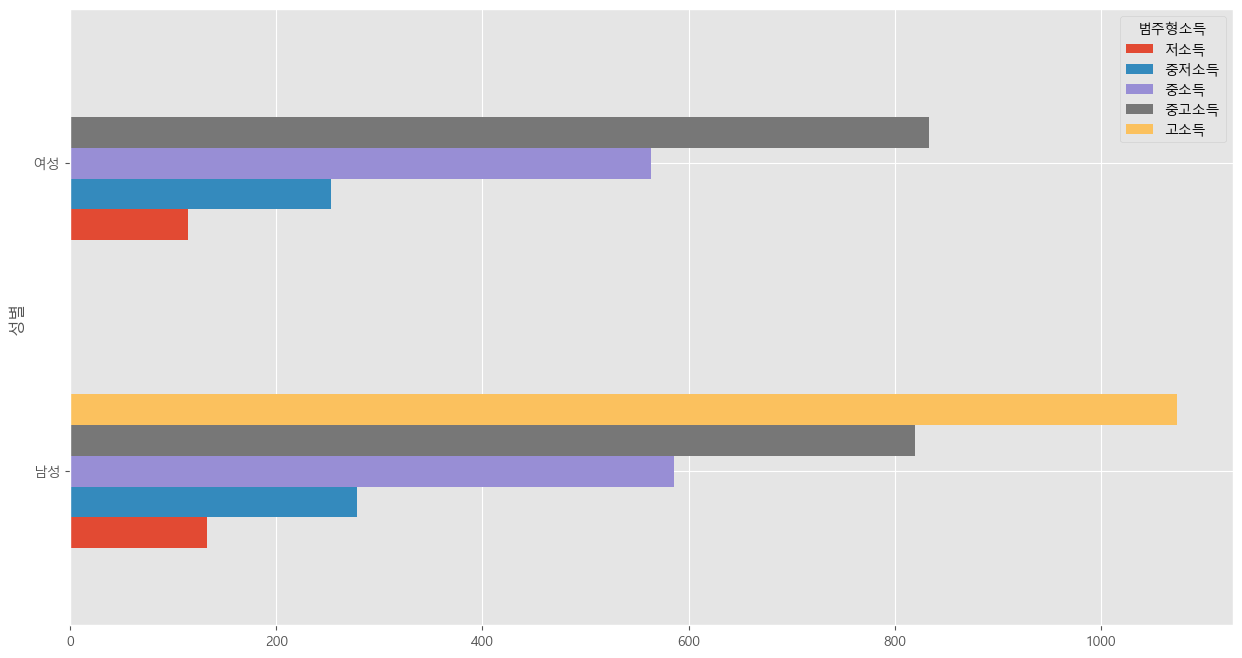

In [80]:
chartdata.plot(kind='barh', figsize=(15, 8))
plt.title('성별/범주형소득별 소득의 평균', size=17)
plt.xlabel('소득 평균', size=15)
plt.ylabel('성별', size=15)
plt.legend(loc='best', fontsize=12) # loc='best'는 배치하기 좋은데 두세요.